### Cross decode improvements... 
Figure out how to make the subplot mosaic

In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.visualization_utils as visualization_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
from constants.behavioral_constants import *
from constants.decoding_constants import *
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import argparse
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


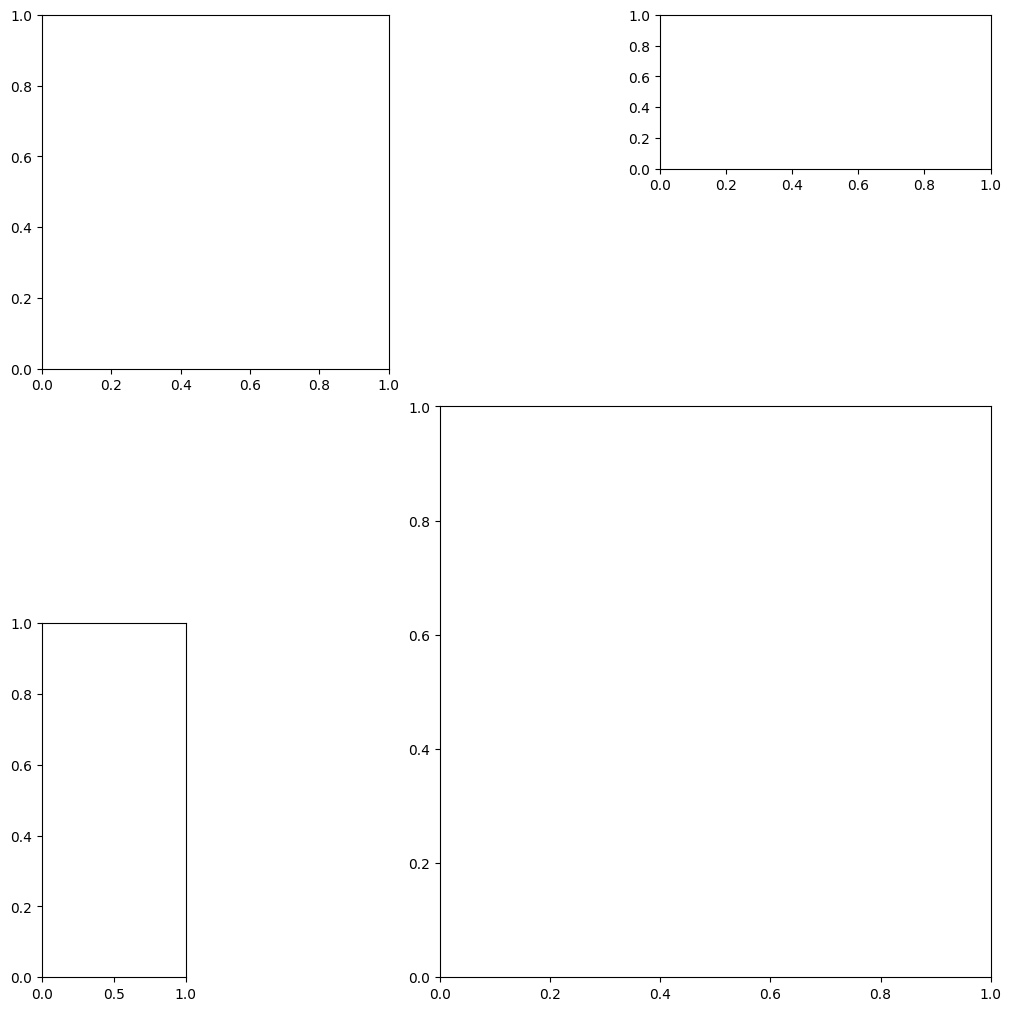

In [3]:
stim_n = 20
fb_n = 33
ratio = 5

layout = [
    ["ss", "ss", "n0", "fs"],
    ["ss", "ss", "n1", "n1"],
    ["n2", "n3", "ff", "ff"],
    ["sf", "n3", "ff", "ff"],
]
# mosaic + some buffer for colorbar
fig, axs = plt.subplot_mosaic(
    layout,
    figsize=(10, 10),
    width_ratios=(10, 10, 10, 23),
    height_ratios=(10, 10, 10, 23),
    constrained_layout=True
)
for i in range(4):
    axs[f"n{i}"].axis("off")

(<Figure size 1100x1000 with 5 Axes>,
 array([[<Axes: ylabel='Time to cards appear (s)'>, <Axes: >],
        [<Axes: xlabel='Time to cards appear (s)', ylabel='Time to feedback (s)'>,
         <Axes: xlabel='Time to feedback (s)'>]], dtype=object))

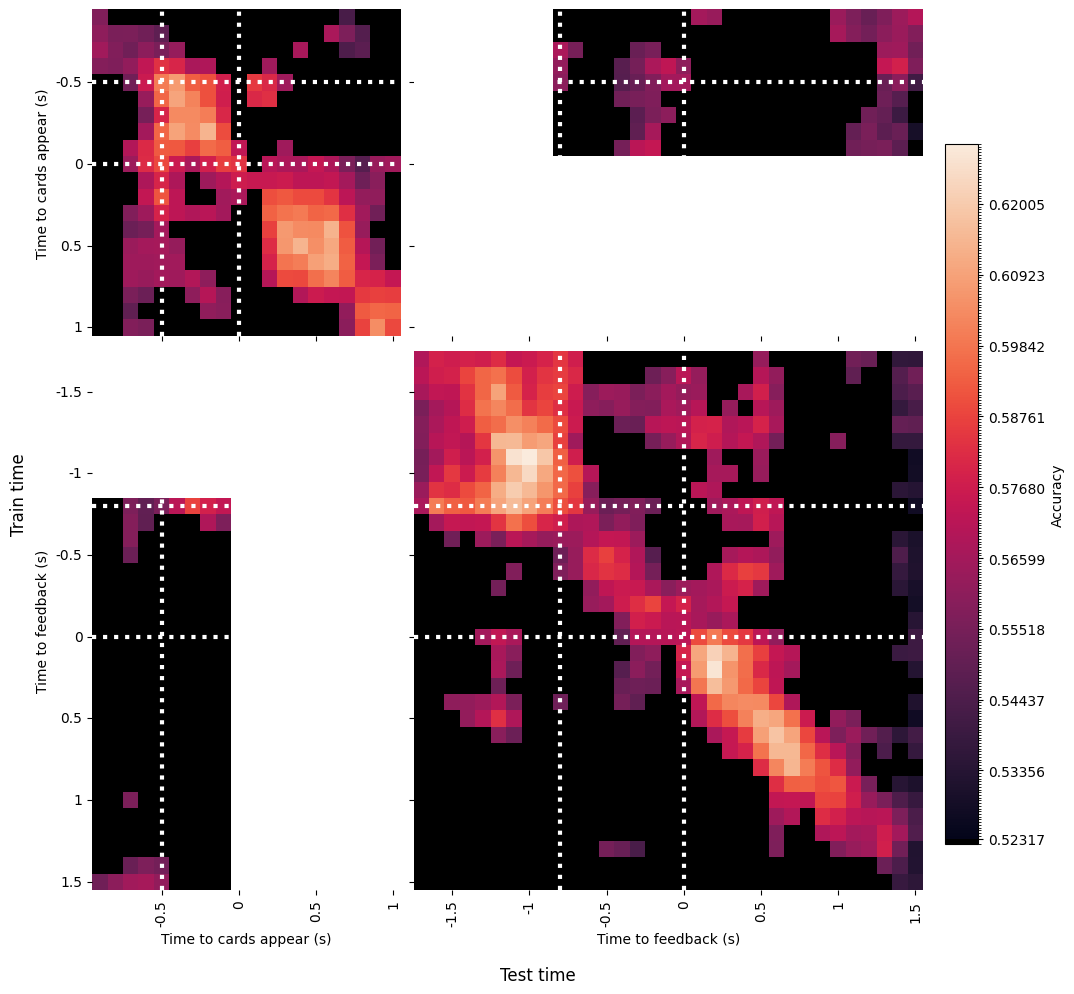

In [17]:
# pref_sig_unit_level = "pref_99th_window_filter_drift"
# conf_sig_unit_level = "conf_99th_window_filter_drift"

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.subject = "both"
args.region_level = "structure_level2"
# args.regions = "lateral_prefrontal_cortex_lat_PFC"
args.regions = "medial_pallium_MPal"

args.mode = "pref"
args.sig_unit_level = f"{args.mode}_99th_window_filter_drift"
# visualization_utils.plot_combined_cross_accs_trunc(args)
visualization_utils.plot_combined_cross_accs(args, ignore_overlap=True, alpha=0.01)

In [1]:
import matplotlib.pyplot as plt

colors = plt.cm.Dark2.colors
print(colors)

((0.10588235294117647, 0.6196078431372549, 0.4666666666666667), (0.8509803921568627, 0.37254901960784315, 0.00784313725490196), (0.4588235294117647, 0.4392156862745098, 0.7019607843137254), (0.9058823529411765, 0.1607843137254902, 0.5411764705882353), (0.4, 0.6509803921568628, 0.11764705882352941), (0.9019607843137255, 0.6705882352941176, 0.00784313725490196), (0.6509803921568628, 0.4627450980392157, 0.11372549019607843), (0.4, 0.4, 0.4))
